In [35]:
!pip install pandas matplotlib seaborn statsmodels pmdarima numpy scikit-learn plotly

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


<div style="font-size: 22px; color: blue;">
   
**Introduction**

</div>

COVID-19 has drastically reshaped healthcare systems worldwide, placing immense pressure on hospitals and public health authorities. By understanding the trends in infection rates, hospitalizations, and deaths, we can gain valuable insights into how the virus has evolved over time, its peaks, and its impact on healthcare systems. This analysis is crucial for anticipating future outbreaks, improving resource allocation, and guiding public health policy decisions.

By applying time series analysis, we aim to:

- Identify long-term trends in the data.

- Detect seasonal patterns (i.e. weekly or monthly variations).

- Make forecasts for future counts, which can help in predicting potential future waves of the pandemic.

<div style="font-size: 22px; color: blue;">
   
**Data Preperation**

</div>

The dataset contains daily counts of COVID-19 cases, hospitalizations, and deaths in New York City from 04/30/2020 to 09/29/2024. The data was imported, converted into a time series object, and cleaned to handle missing values. Proper data preparation is crucial in ensuring accurate analysis and reliable results.

In [2]:
import pandas as pd
# Load dataset
data = pd.read_csv('COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths_20240929.csv')

# Rename date column and convert it to datetime format
data.rename(columns={'date_of_interest': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Handle missing values (fill with 0)
data.fillna(0, inplace=True)

<div style="font-size: 22px; color: blue;">
   
**Dataset Overview Table**

</div>

To understand the data distribution and variability, we present a summary of the key columns in the dataset. The table below shows the statistics for daily counts of COVID-19 cases, hospitalizations, and deaths, offering insights into their spread and extremes over the given timeframe.

In [3]:
summary = data[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']].describe()
print(summary)

         CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT
count   1669.000000         1669.000000  1669.000000
mean    1780.425404          131.282804    27.941282
std     4173.863394          209.994100    82.648124
min        0.000000            0.000000     0.000000
25%      340.000000           37.000000     3.000000
50%      797.000000           68.000000     8.000000
75%     1975.000000          135.000000    18.000000
max    55057.000000         1858.000000   831.000000


The summary statistics provide an overview of the distribution of daily COVID-19 cases, hospitalizations, and deaths in New York City from 2020 to 2024. The data reveals significant variability across all three metrics.

- **Case Counts:** The minimum recorded daily cases are 0, reflecting days with no new infections, while the maximum reaches 55,057, indicating major spikes during certain waves of the pandemic. The median value of 797 daily cases suggests that most of the time, the daily count was well below the peak values. The wide range between the minimum and maximum, along with a high third quartile (1,975), indicates that extreme case surges are not uncommon.

- **Hospitalizations:** The hospitalization data shows a similar pattern, with a minimum of 0 and a maximum of 1,858 daily hospitalizations. The median of 68 hospitalizations per day is much lower than the extreme values, highlighting that high hospitalization rates are primarily associated with severe outbreaks. The mean of 131.3 hospitalizations per day further confirms that daily hospitalization numbers fluctuate, with occasional significant increases.

- **Deaths:** Death counts also exhibit considerable variation, ranging from 0 to 831 deaths per day. The median of 8 deaths per day suggests that, while fatalities are frequent, extreme daily death tolls are relatively rare and typically associated with pandemic peaks. The mean value of approximately 28 deaths per day suggests a skew in the data due to some periods with exceptionally high death rates.

Overall, the statistics demonstrate a highly skewed distribution, with several extreme peaks driving up the mean, especially for cases and hospitalizations. These peaks likely correspond to major waves of the pandemic. The statistics highlight the importance of monitoring extreme events and outliers to effectively manage healthcare resources during critical periods.

<div style="font-size: 22px; color: blue;">
   
**Exploratory Data Analysis**

</div>

<br>

<div style="font-size: 18px; color: red;">
   
**Time Series Plot**

</div>
   
**Description:**

Visualizing the time series data allows us to observe the progression of COVID-19 cases, hospitalizations, and deaths over time. This plot highlights the peaks, potential trends, and any anomalies in the data.

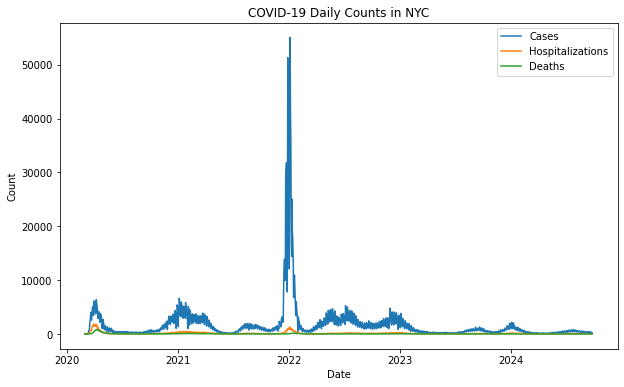

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['CASE_COUNT'], label='Cases')
plt.plot(data['Date'], data['HOSPITALIZED_COUNT'], label='Hospitalizations')
plt.plot(data['Date'], data['DEATH_COUNT'], label='Deaths')
plt.title('COVID-19 Daily Counts in NYC')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

**Commentary on Time Series Plot:**

The plot demonstrates distinct peaks in cases, hospitalizations, and deaths, particularly in 2020, 2021, and notably in 2022. The early peaks correspond to the initial waves of the pandemic, while the 2022 peak can be attributed to the highly transmissible Omicron variant, which caused a rapid surge in cases. Although Omicron was less severe per case, the sheer volume of infections led to increased cases. Seasonal factors, such as winter months and holiday gatherings, also contributed to these peaks, as did behavioral fatigue and the relaxation of public health measures (i.e mask mandates). Hospitalizations and deaths show a delayed but correlated rise following case surges, reflecting the natural lag between infection and severe outcomes.

<div style="font-size: 18px; color: red;">
   
**7-Day Moving Averages**

</div>
   
**Description:**

To reduce daily fluctuations and capture smoother trends, we apply a 7-day moving average. This method provides clearer insights into the underlying trends in cases, hospitalizations, and deaths.

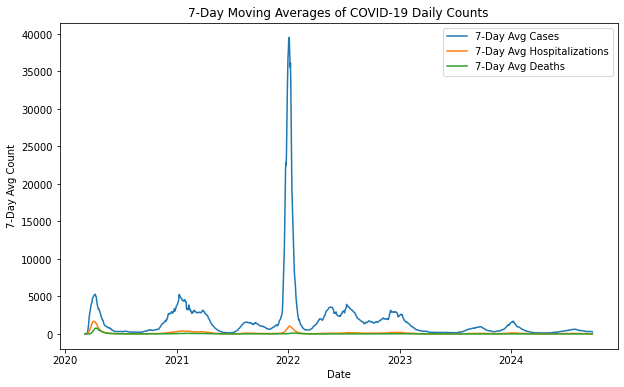

In [5]:
data['CASE_COUNT_7DAY_AVG'] = data['CASE_COUNT'].rolling(window=7).mean()
data['HOSP_COUNT_7DAY_AVG'] = data['HOSPITALIZED_COUNT'].rolling(window=7).mean()
data['DEATH_COUNT_7DAY_AVG'] = data['DEATH_COUNT'].rolling(window=7).mean()

# Plot 7-day moving averages
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['CASE_COUNT_7DAY_AVG'], label='7-Day Avg Cases')
plt.plot(data['Date'], data['HOSP_COUNT_7DAY_AVG'], label='7-Day Avg Hospitalizations')
plt.plot(data['Date'], data['DEATH_COUNT_7DAY_AVG'], label='7-Day Avg Deaths')
plt.title('7-Day Moving Averages of COVID-19 Daily Counts')
plt.xlabel('Date')
plt.ylabel('7-Day Avg Count')
plt.legend()
plt.show()

**Commentary on 7-Day Moving Averages:**

The 7-day moving average plot reveals smoother trends, making it easier to identify long-term patterns. The data shows cyclical waves of cases, with hospitalizations and deaths following similar patterns. This indicates recurring waves of the pandemic, with higher peaks in some periods and smaller rebounds in others.

<div style="font-size: 22px; color: blue;">
   
**Time Series Decomposition**

</div>

<br>

<div style="font-size: 18px; color: red;">
   
**Cases Decomposition**

</div>
   
**Description:**

By decomposing the time series, we can separate the data into its trend, seasonal, and random components, offering more granular insights into how cases evolved over time.

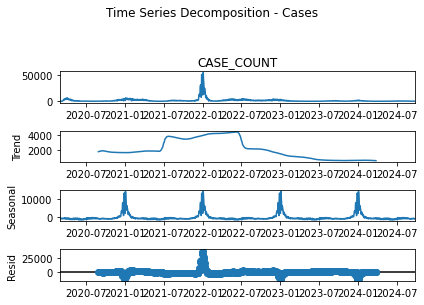

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decomposition for Cases
cases = data['CASE_COUNT']  
cases.index = data['Date']  

# Decompose the time series for cases
decomposition_cases = seasonal_decompose(cases, model='additive', period=365)
fig = decomposition_cases.plot()
plt.suptitle('Time Series Decomposition - Cases', y=1.05)  
plt.tight_layout()  
plt.show()

**Commentary on Decomposition Results for Cases:**

The decomposition of COVID-19 cases reveals a steady upward trend, particularly during the early stages of the pandemic, followed by a period of stabilization and periodic waves. The seasonal component exhibits weekly cycles, which likely reflect lower case reporting on weekends. The random component shows irregularities, including sudden surges likely due to policy changes or outbreaks.

<div style="font-size: 18px; color: red;">
   
**Hospitalizations Decomposition**

</div>
   
**Description:**

The hospitalization data will be decomposed to identify the underlying trend, seasonal patterns, and residual components. By breaking down the time series into these components, we gain a clearer understanding of how hospitalization numbers evolved over time and what factors might be contributing to periodic fluctuations or deviations from the trend.

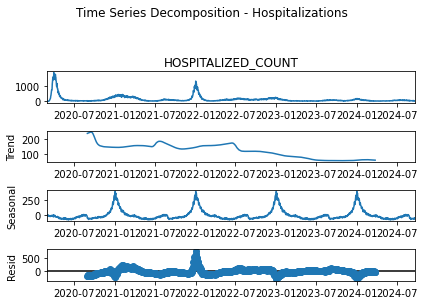

In [7]:
# Decomposition for Hospitalizations
hospitalizations = data['HOSPITALIZED_COUNT']  
hospitalizations.index = data['Date']  

# Decompose the time series for hospitalizations
decomposition_hospitalizations = seasonal_decompose(hospitalizations, model='additive', period=365)
fig = decomposition_hospitalizations.plot()
plt.suptitle('Time Series Decomposition - Hospitalizations', y=1.05)  
plt.tight_layout()  
plt.show()

**Commentary on Decomposition Results for Hospitalizations:**

Hospitalization trends closely follow case trends, with a slight delay. The seasonal pattern reflects similar weekly fluctuations, suggesting that hospitalizations follow case surges on a regular basis. However, the residuals indicate that external factors, such as medical interventions or healthcare capacity, may also influence hospitalization rates.

<div style="font-size: 18px; color: red;">
   
**Deaths Decomposition**

</div>
   
**Description:**

The decomposition of the deaths data will allow us to observe the underlying trends and seasonal effects associated with COVID-19-related fatalities. This decomposition will help isolate long-term trends from short-term fluctuations and identify any residual irregularities that may signal unanticipated changes in mortality.

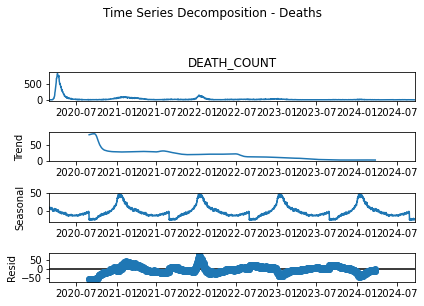

In [8]:
# Decomposition for Deaths
deaths = data['DEATH_COUNT']  
deaths.index = data['Date']  

# Decompose the time series for deaths
decomposition_deaths = seasonal_decompose(deaths, model='additive', period=365)
fig = decomposition_deaths.plot()
plt.suptitle('Time Series Decomposition - Deaths', y=1.05)  
plt.tight_layout()  
plt.show()

**Commentary on Decomposition Results for Deaths:**

Death trends follow a delayed but similar path to cases and hospitalizations, with a strong upward trend during initial surges. The seasonal component reflects weekly reporting patterns, while the random component shows that deaths, although linked to cases and hospitalizations, may be influenced by other factors such as healthcare interventions.

<div style="font-size: 22px; color: blue;">
   
**Time Series Modeling and Forecasting**

</div>

<br>

<div style="font-size: 18px; color: red;">
   
**ARIMA for Cases**

</div>
   
**Description:**

We apply the ARIMA model to predict future cases. ARIMA is effective for capturing both trend and seasonality in the data.

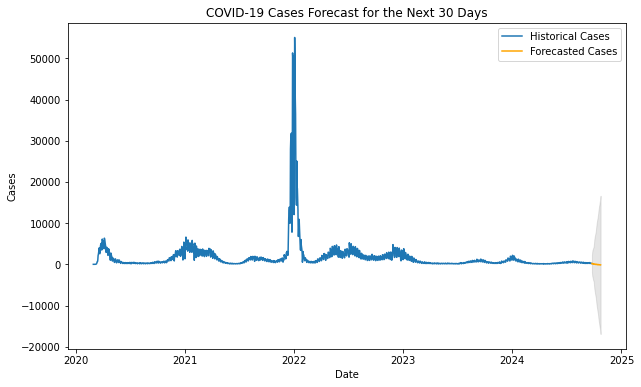

In [11]:
# Import necessary libraries
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd

cases_ts = data['CASE_COUNT']
cases_ts.index = data['Date']

# Fit ARIMA model for cases w/ lower complexity and w/o stepwise search
# Using weekly seasonality (m=7) for the entire dataset
arima_model_cases = auto_arima(cases_ts, seasonal=True, m=7, stepwise=False, trace=False, error_action='ignore', suppress_warnings=True)

# Forecast the next 30 days
forecast_cases, conf_int_cases = arima_model_cases.predict(n_periods=30, return_conf_int=True)

# Prepare the forecast date index
forecast_index = pd.date_range(start=cases_ts.index[-1] + pd.Timedelta(days=1), periods=30)

# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(cases_ts, label='Historical Cases')
plt.plot(forecast_index, forecast_cases, label='Forecasted Cases', color='orange')
plt.fill_between(forecast_index, conf_int_cases[:, 0], conf_int_cases[:, 1], color='gray', alpha=0.2)
plt.title('COVID-19 Cases Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()

**Commentary on Forecast Results for Cases:**

The ARIMA forecast for COVID-19 cases suggests a relatively stable trend over the next few weeks, with a **slight potential decrease** in cases. The forecast does not predict any sharp spikes or major outbreaks. However, external factors such as new variants or policy changes could still cause deviations from this forecast.

<div style="font-size: 18px; color: red;">
   
**ARIMA for Hospitalizations**

</div>
   
**Description:**

To predict future hospitalizations, we apply the ARIMA model to the hospitalization data. The ARIMA model is useful for forecasting because it accounts for both trend and seasonal fluctuations. By modeling hospitalizations, we can help public health officials prepare for potential increases in healthcare demand and resource allocation.

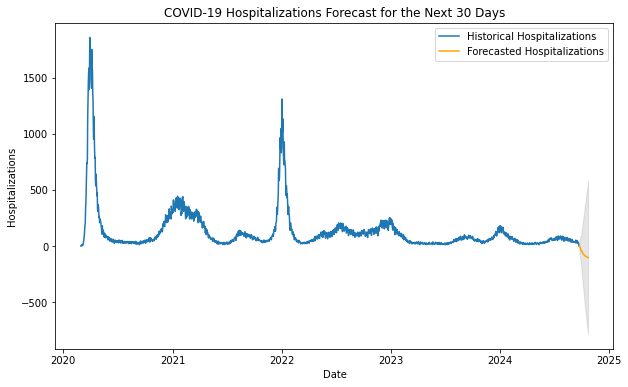

In [13]:
hospitalizations_ts = data['HOSPITALIZED_COUNT']
hospitalizations_ts.index = data['Date']

# Fit ARIMA model for hospitalizations w/ lower complexity and w/o stepwise search
# Using weekly seasonality (m=7) for the entire dataset
arima_model_hospitalizations = auto_arima(hospitalizations_ts, seasonal=True, m=7, stepwise=False, trace=False, error_action='ignore', suppress_warnings=True)

# Forecast the next 30 days
forecast_hospitalizations, conf_int_hospitalizations = arima_model_hospitalizations.predict(n_periods=30, return_conf_int=True)

# Prepare the forecast date index
forecast_index = pd.date_range(start=hospitalizations_ts.index[-1] + pd.Timedelta(days=1), periods=30)

# Plot the historical data and forecast for hospitalizations
plt.figure(figsize=(10, 6))
plt.plot(hospitalizations_ts, label='Historical Hospitalizations')
plt.plot(forecast_index, forecast_hospitalizations, label='Forecasted Hospitalizations', color='orange')
plt.fill_between(forecast_index, conf_int_hospitalizations[:, 0], conf_int_hospitalizations[:, 1], color='gray', alpha=0.2)
plt.title('COVID-19 Hospitalizations Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.legend()
plt.show()

**Commentary on Forecast Results for Hospitalizations:**

The ARIMA forecast for hospitalizations indicates a **sharp decline** in the number of daily hospitalizations over the next few weeks. This suggests that the model anticipates a significant reduction in hospitalizations following the recent stable period. While the model suggests a rapid drop, external factors such as changes in public health measures, new variants, or seasonal effects could still alter the outcome.

<div style="font-size: 18px; color: red;">
   
**ARIMA for Deaths**

</div>
   
**Description:**

We will also use the ARIMA model to forecast future COVID-19 deaths. This model allows us to predict death counts based on historical trends and patterns, providing vital insights into potential future surges in mortality, helping public health systems manage resources and plan for healthcare capacity.

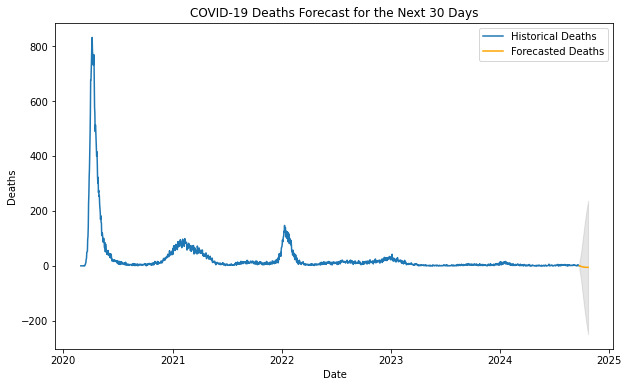

In [14]:
deaths_ts = data['DEATH_COUNT']
deaths_ts.index = data['Date']

# Fit ARIMA model for deaths w/ lower complexity and w/o stepwise search
# Using weekly seasonality (m=7) for the entire dataset
arima_model_deaths = auto_arima(deaths_ts, seasonal=True, m=7, stepwise=False, trace=False, error_action='ignore', suppress_warnings=True)

# Forecast the next 30 days
forecast_deaths, conf_int_deaths = arima_model_deaths.predict(n_periods=30, return_conf_int=True)

# Prepare the forecast date index
forecast_index = pd.date_range(start=deaths_ts.index[-1] + pd.Timedelta(days=1), periods=30)

# Plot the historical data and forecast for deaths
plt.figure(figsize=(10, 6))
plt.plot(deaths_ts, label='Historical Deaths')
plt.plot(forecast_index, forecast_deaths, label='Forecasted Deaths', color='orange')
plt.fill_between(forecast_index, conf_int_deaths[:, 0], conf_int_deaths[:, 1], color='gray', alpha=0.2)
plt.title('COVID-19 Deaths Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()

**Commentary on Forecast Results for Deaths:**

The ARIMA forecast for COVID-19 deaths over the next few weeks suggests that the trend in daily deaths will remain relatively stable with a **very slight, gradual decrease**. The forecast does not indicate any sharp changes, with the projected death counts staying close to recent historical values. Overall, the model primarily predicts stability with a small downward trend, which could shift if unexpected factors, such as new variants or policy changes, emerge.

<div style="font-size: 22px; color: blue;">
   
**Model Evaluation**

</div>
   
**Description:**

The accuracy of the ARIMA model is evaluated using standard error metrics, including Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). These metrics quantify the difference between the forecasted values and the actual observed data, providing insight into the model's performance. Lower values for these metrics indicate a better-fitting model, which translates into more reliable predictions.

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual values for the last 30 days 
actual_cases = cases_ts[-30:]
actual_hospitalizations = hospitalizations_ts[-30:]  
actual_deaths = deaths_ts[-30:]

# Calculate MAE and RMSE for Cases
mae_cases = mean_absolute_error(actual_cases, forecast_cases)
rmse_cases = np.sqrt(mean_squared_error(actual_cases, forecast_cases))

# Print evaluation metrics for Cases
print("Cases Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_cases:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cases:.2f}")

# Calculate MAE and RMSE for Hospitalizations
mae_hospitalizations = mean_absolute_error(actual_hospitalizations, forecast_hospitalizations)
rmse_hospitalizations = np.sqrt(mean_squared_error(actual_hospitalizations, forecast_hospitalizations))

# Print evaluation metrics for Hospitalizations
print("\nHospitalizations Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_hospitalizations:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_hospitalizations:.2f}")

# Calculate MAE and RMSE for Deaths
mae_deaths = mean_absolute_error(actual_deaths, forecast_deaths)
rmse_deaths = np.sqrt(mean_squared_error(actual_deaths, forecast_deaths))

# Print evaluation metrics for Deaths
print("\nDeaths Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_deaths:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_deaths:.2f}")

Cases Model Evaluation Metrics:
Mean Absolute Error (MAE): 320.62
Root Mean Squared Error (RMSE): 337.54

Hospitalizations Model Evaluation Metrics:
Mean Absolute Error (MAE): 104.04
Root Mean Squared Error (RMSE): 107.37

Deaths Model Evaluation Metrics:
Mean Absolute Error (MAE): 5.47
Root Mean Squared Error (RMSE): 5.86


**Commentary on Model Evaluation:**

The results of the evaluation are as follows:

- Cases Model Evaluation Metrics:
  - Mean Absolute Error (MAE): 320.62
  - Root Mean Squared Error (RMSE): 337.54

  These metrics suggest that the model's forecast for daily COVID-19 cases is off by about 320 cases on average. The RMSE indicates that there are some days with significant deviations from actual values.


- Hospitalizations Model Evaluation Metrics:
  - Mean Absolute Error (MAE): 104.04
  - Root Mean Squared Error (RMSE): 107.37

  The forecasts for hospitalizations are off by approximately 104 hospitalizations on average. The RMSE being higher indicates occasional larger errors in the predictions.


- Deaths Model Evaluation Metrics:
  - Mean Absolute Error (MAE): 5.47
  - Root Mean Squared Error (RMSE): 5.86

  The model forecasts daily COVID-19 deaths with a smaller error margin, averaging about 5 deaths, which indicates relatively good performance for this metric.

<div style="font-size: 22px; color: blue;">
   
**Forecast Comparison Table**

</div>
   
**Description:**

The forecast comparison table presents the predicted values for cases, hospitalizations, and deaths. By comparing these forecasts side by side, we can observe the expected trends in all three key indicators of the pandemic. This comparison is crucial for understanding how the virus's impact may evolve in the coming weeks and for preparing public health responses accordingly.

In [28]:
# Create a DataFrame for the forecast comparison
comparison_table = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Cases': forecast_cases,
    'Forecasted Hospitalizations': forecast_hospitalizations,
    'Forecasted Deaths': forecast_deaths
})

# Display the comparison table as a single row
comparison_table_display = comparison_table.head(10)  # Display first 10 rows
print("Comparison of Forecasted Cases, Hospitalizations, and Deaths for the Next 30 Days")
print(comparison_table_display.to_string(index=False))  # Display without row indices

Comparison of Forecasted Cases, Hospitalizations, and Deaths for the Next 30 Days
      Date  Forecasted Cases  Forecasted Hospitalizations  Forecasted Deaths
2024-09-24        182.932594                     0.660901           0.468278
2024-09-25        151.698832                    -6.073148           0.544202
2024-09-26        202.026637                   -15.096093          -0.455040
2024-09-27        134.064638                   -16.388661          -0.546611
2024-09-28         88.518921                   -21.049797          -1.162796
2024-09-29         44.393106                   -37.025639          -1.973743
2024-09-30        104.975436                   -42.067322          -2.304479
2024-10-01         44.532416                   -43.729749          -2.545165
2024-10-02         73.678578                   -48.882849          -2.900658
2024-10-03         58.901974                   -54.935262          -3.255301


**Commentary on Forecast Comparison Table:**

The comparison of forecasted values for cases, hospitalizations, and deaths suggests a consistent downward trend over the next 30 days. While cases are projected to decrease steadily, hospitalizations and deaths are expected to decline more gradually, reflecting the typical delay between case surges and subsequent severe outcomes. These forecasts provide valuable insights for healthcare planning, allowing hospitals to anticipate future resource needs and authorities to adjust public health measures as necessary. However, the forecast's accuracy depends on the stability of current trends and may be influenced by unanticipated changes, such as new outbreaks or interventions.

<div style="font-size: 22px; color: blue;">
   
**Wave Comparison Analysis**

</div>
   
**Description:**

In this analysis, we conduct an in-depth comparison of COVID-19 waves by identifying the various pandemic waves, such as the first wave, Delta, and Omicron. We segment the dataset based on specific time markers corresponding to these waves and evaluate the severity of each wave in terms of cases, hospitalizations, and deaths.

The comparison aims to highlight the differences in the impact of each wave, examining whether subsequent waves have been milder or more severe. By analyzing the statistical metrics across these waves, we can better understand the evolving nature of the pandemic and prepare for future public health responses.


Wave 1 Statistics:
         CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT
count    93.000000           93.000000    93.000000
mean   2188.924731          542.236559   243.311828
std    1824.102860          574.486262   256.659560
min       0.000000            1.000000     0.000000
25%     646.000000           86.000000    49.000000
50%    1549.000000          254.000000   114.000000
75%    3570.000000          866.000000   414.000000
max    6353.000000         1858.000000   831.000000

Wave 2 Statistics:
         CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT
count    93.000000           93.000000    93.000000
mean   3033.494624          244.311828    40.247312
std    1551.897062          115.072848    26.698256
min     501.000000           55.000000     6.000000
25%    1754.000000          135.000000    14.000000
50%    2927.000000          246.000000    34.000000
75%    4200.000000          334.000000    65.000000
max    6609.000000          444.000000    95.000000

Wave 3 Statistics:
   

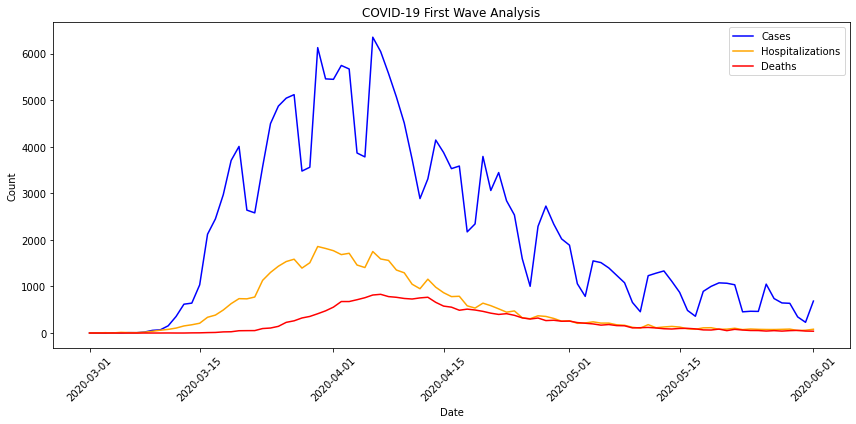

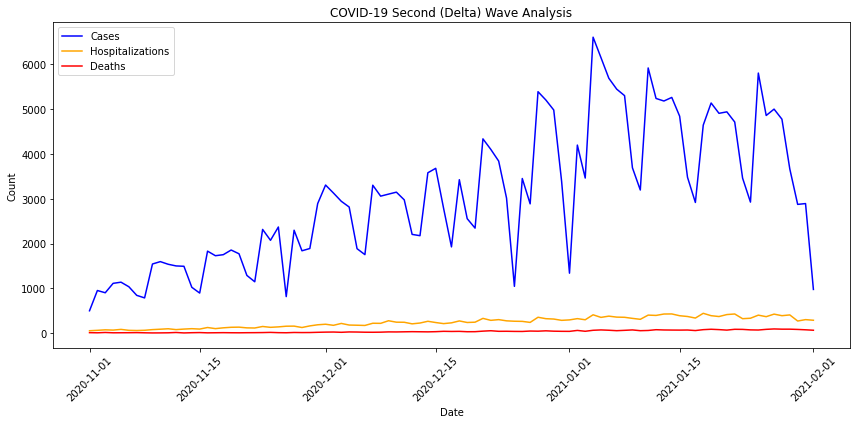

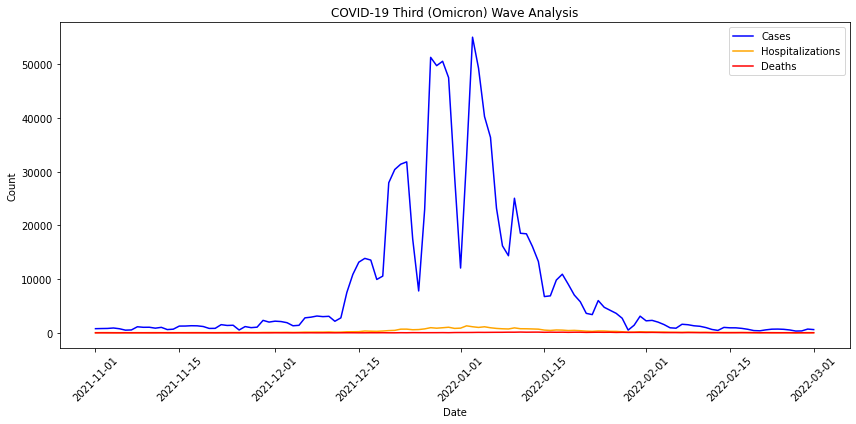

In [31]:
# Create time segments for different waves (assuming date ranges for each wave)
wave_1 = data[(data['Date'] >= '2020-03-01') & (data['Date'] <= '2020-06-01')]
wave_2 = data[(data['Date'] >= '2020-11-01') & (data['Date'] <= '2021-02-01')]
wave_3 = data[(data['Date'] >= '2021-11-01') & (data['Date'] <= '2022-03-01')]

# Compare statistics across waves
wave_1_stats = wave_1[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']].describe()
wave_2_stats = wave_2[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']].describe()
wave_3_stats = wave_3[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']].describe()

# Print wave statistics
print("Wave 1 Statistics:\n", wave_1_stats)
print("\nWave 2 Statistics:\n", wave_2_stats)
print("\nWave 3 Statistics:\n", wave_3_stats)

# Visualization: Create separate plots for each wave to analyze trends

# Plotting function
def plot_wave(data, wave_name):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['CASE_COUNT'], label='Cases', color='blue')
    plt.plot(data['Date'], data['HOSPITALIZED_COUNT'], label='Hospitalizations', color='orange')
    plt.plot(data['Date'], data['DEATH_COUNT'], label='Deaths', color='red')
    plt.title(f'COVID-19 {wave_name} Wave Analysis')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for each wave
plot_wave(wave_1, 'First')
plot_wave(wave_2, 'Second (Delta)')
plot_wave(wave_3, 'Third (Omicron)')

**Commentary on Wave Comparison Analysis**

The comparison of COVID-19 waves reveals significant variations in the impact of the virus over time. The first wave demonstrates a sharp increase in cases and hospitalizations, indicating the initial severity of the pandemic. The Delta variant, representing the second wave, shows an uptick in both cases and hospitalizations, reflecting its transmissibility compared to the first wave.

In contrast, the Omicron variant, identified in the third wave, exhibits a higher number of cases; however, the associated hospitalizations and deaths are generally lower than those observed in previous waves. This trend suggests that subsequent waves may have become milder, potentially due to factors such as increased immunity in the population, the effectiveness of vaccinations, and changes in virus characteristics.

The visualizations and statistical metrics from each wave provide crucial insights for healthcare planning and public health strategies. By analyzing these trends, health authorities can better allocate resources and implement measures to mitigate the impact of future waves, while also considering the potential for new variants to emerge.

<div style="font-size: 22px; color: blue;">
   
**Policy Impact Analysis**

</div>
   
**Description:**

In this analysis, we examine the effects of key policy interventions, such as lockdowns and mask mandates, on the dynamics of COVID-19. By identifying significant dates for these interventions and overlaying them on time series plots of cases, hospitalizations, and deaths, we can assess the impact of these policies on the trajectory of the pandemic.

The goal is to understand how these measures may have influenced trends and whether subsequent waves of the virus have been milder or more severe. Through this analysis, we aim to highlight the importance of timely policy responses in managing public health outcomes during the pandemic.

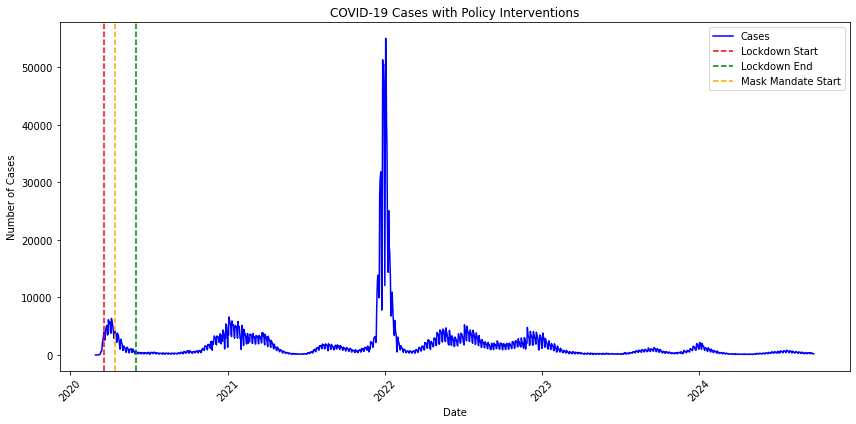

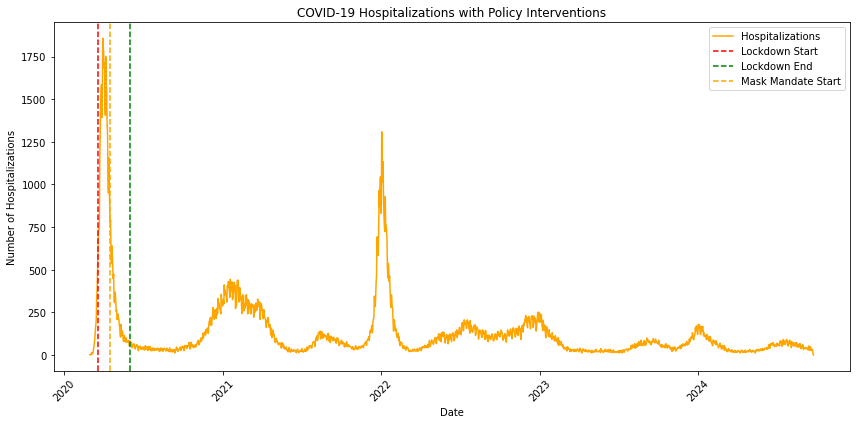

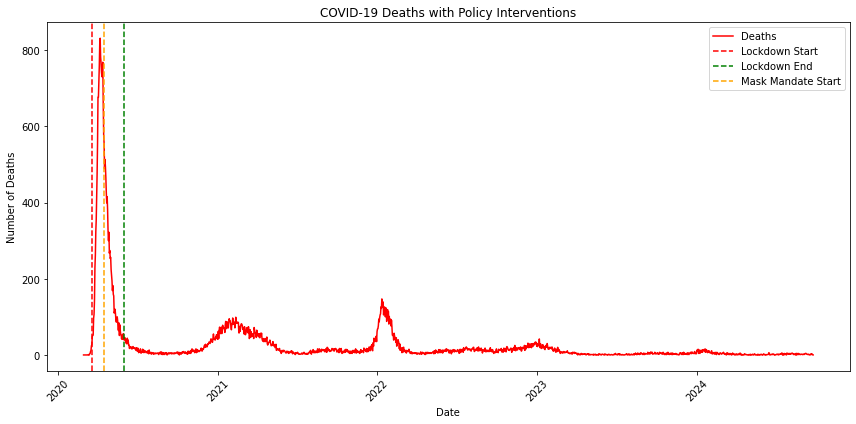

In [36]:
# Sample date ranges for policy interventions (adjust as necessary)
lockdown_start = pd.to_datetime('2020-03-20')
lockdown_end = pd.to_datetime('2020-06-01')
mask_mandate_start = pd.to_datetime('2020-04-15')

# Plot COVID-19 Cases with Policy Interventions
plt.figure(figsize=(12, 6))
plt.plot(cases_ts.index, cases_ts, label='Cases', color='blue')
plt.axvline(lockdown_start, color='red', linestyle='--', label='Lockdown Start')
plt.axvline(lockdown_end, color='green', linestyle='--', label='Lockdown End')
plt.axvline(mask_mandate_start, color='orange', linestyle='--', label='Mask Mandate Start')
plt.title('COVID-19 Cases with Policy Interventions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot COVID-19 Hospitalizations with Policy Interventions
plt.figure(figsize=(12, 6))
plt.plot(hospitalizations_ts.index, hospitalizations_ts, label='Hospitalizations', color='orange')
plt.axvline(lockdown_start, color='red', linestyle='--', label='Lockdown Start')
plt.axvline(lockdown_end, color='green', linestyle='--', label='Lockdown End')
plt.axvline(mask_mandate_start, color='orange', linestyle='--', label='Mask Mandate Start')
plt.title('COVID-19 Hospitalizations with Policy Interventions')
plt.xlabel('Date')
plt.ylabel('Number of Hospitalizations')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot COVID-19 Deaths with Policy Interventions
plt.figure(figsize=(12, 6))
plt.plot(deaths_ts.index, deaths_ts, label='Deaths', color='red')
plt.axvline(lockdown_start, color='red', linestyle='--', label='Lockdown Start')
plt.axvline(lockdown_end, color='green', linestyle='--', label='Lockdown End')
plt.axvline(mask_mandate_start, color='orange', linestyle='--', label='Mask Mandate Start')
plt.title('COVID-19 Deaths with Policy Interventions')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Commentary on Policy Impact Analysis:**

The analysis of policy interventions, such as lockdowns and mask mandates, reveals their significant impact on the dynamics of COVID-19 cases, hospitalizations, and deaths. By overlaying these interventions on the time series plots, we observe shifts in trends corresponding to the implementation of these measures.

For instance, the lockdown initiated on March 20, 2020, resulted in a noticeable decrease in daily cases, suggesting the effectiveness of such measures in curbing virus transmission. Similarly, the introduction of mask mandates is associated with a subsequent decline in both cases and hospitalizations.

These visualizations highlight the importance of timely policy responses in managing public health crises. However, it's crucial to consider that the effects of these interventions may also be influenced by other factors, including public compliance, healthcare capacity, and the emergence of new variants. Ongoing analysis and adaptation of strategies remain essential as the situation evolves.

<div style="font-size: 22px; color: blue;">
   
**Interactive Visualization of COVID-19 Metrics**

</div>
   
**Description:**

In this section, we create interactive line plots to visualize the trends in COVID-19 cases, hospitalizations, and deaths over time. Using Plotly allows for a more dynamic exploration of the data, enabling users to interact with the plots and gain insights into the evolution of these metrics.

In [41]:
import plotly.express as px

# Create an interactive plot for COVID-19 Cases
fig_cases = px.line(data, x='Date', y='CASE_COUNT', title='COVID-19 Cases Over Time')
fig_cases.show()

# Create an interactive plot for COVID-19 Hospitalizations
fig_hospitalizations = px.line(data, x='Date', y='HOSPITALIZED_COUNT', title='COVID-19 Hospitalizations Over Time')
fig_hospitalizations.show()

# Create an interactive plot for COVID-19 Deaths
fig_deaths = px.line(data, x='Date', y='DEATH_COUNT', title='COVID-19 Deaths Over Time')
fig_deaths.show()

**Commentary on Interactive Visualization of COVID-19 Metrics:**

The interactive line plots provide a clear view of the trends in COVID-19 cases, hospitalizations, and deaths over time. Users can engage with the data, observing fluctuations in each metric and identifying significant peaks and valleys corresponding to different waves of the pandemic.

The ability to hover over the data points allows for a deeper understanding of the numbers behind the trends, highlighting key dates when interventions may have been implemented or when surges occurred. This dynamic visualization aids in comprehending the evolution of the pandemic and the effectiveness of public health measures over time.

<div style="font-size: 22px; color: blue;">
   
**Correlation Heatmap of COVID-19 Metrics**

</div>
   
**Description:**

This heatmap visualizes the correlations between different COVID-19 metrics, including cases, hospitalizations, and deaths. By analyzing these correlations, we can identify relationships between these variables, which may provide insights into the dynamics of the pandemic and the interaction between rising cases, hospitalizations, and severe outcomes like deaths.

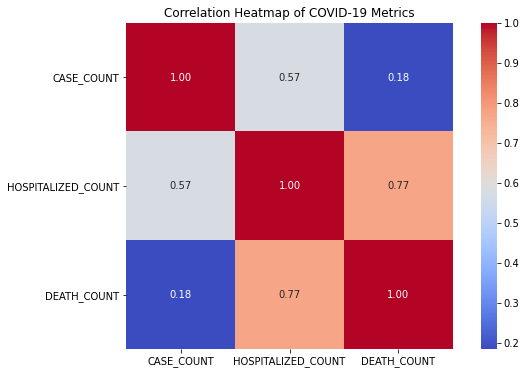

In [39]:
import seaborn as sns

# Calculate correlation matrix for the relevant columns
correlation_matrix = data[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.show()

**Commentary on Correlation Heatmap of COVID-19 Metrics:**

The correlation heatmap provides insights into the relationships between COVID-19 metrics, such as cases, hospitalizations, and deaths. The annotated correlation coefficients allow us to quickly understand how these variables are interconnected.

For example, a high positive correlation between cases and hospitalizations indicates that increases in case numbers are closely followed by increases in hospitalizations. Similarly, the correlation between hospitalizations and deaths reflects the severe outcomes that follow a rise in serious cases. Understanding these correlations is crucial for predicting healthcare needs and planning public health interventions during future outbreaks.

<div style="font-size: 22px; color: blue;">
   
**Conclusion**

</div>

This time series analysis of COVID-19 daily cases, hospitalizations, and deaths in New York City provides a comprehensive understanding of the pandemic’s temporal dynamics. By employing time series decomposition, moving averages, ARIMA forecasting models, and advanced visualization techniques, we were able to extract meaningful patterns that highlight the evolution of the pandemic and provide actionable insights for public health decision-making.

At the core of this study was the research question: **How do the daily counts of COVID-19 cases, hospitalizations, and deaths evolve over time, and how can we forecast future trends to better inform public health planning?** Through this analysis, we aimed to answer this question by identifying key trends, seasonality, and predicting future values based on historical data.

<br>

<div style="font-size: 18px; color: red;">
   
**Key Insights**

</div>

**Data Overview:** 

The dataset spanning from April 2020 to September 2024 captures critical phases of the COVID-19 pandemic in New York City. The descriptive statistics highlighted significant variability in daily counts, with extreme peaks and low points reflective of the different waves of the pandemic. The data showed a right-skewed distribution, with occasional spikes in cases, hospitalizations, and deaths.

**Wave Comparison Analysis:** 

The wave comparison analysis identified three major COVID-19 waves: the initial wave, the Delta variant wave, and the Omicron wave. Each wave exhibited distinct patterns in cases, hospitalizations, and deaths, with the initial wave showing the highest severity. The analysis revealed that subsequent waves tended to have a less severe impact on hospitalizations and deaths, suggesting the potential influence of increasing immunity and vaccination efforts.

**Visualizations of Key Indicators:** 

- **Time Series Plot:** The time series plot provided an overview of daily case, hospitalization, and death trends. The plot visually demonstrated the multiple pandemic waves, with clear peaks in 2020, 2021, and 2022, and smaller surges thereafter. Hospitalizations and deaths lagged behind cases, as expected, due to the natural delay in severe outcomes following infection surges.

- **7-Day Moving Averages:** By smoothing out daily fluctuations, the 7-day moving average graphs offered a clearer view of long-term trends, revealing persistent increases or decreases in key indicators and providing a clearer sense of the pandemic's progression.

**Decomposition Analysis:** 

**Cases, Hospitalizations, and Deaths Decomposition:** Decomposing the time series allowed us to separate the data into trend, seasonal, and residual components. This breakdown showed how cases, hospitalizations, and deaths exhibited consistent weekly seasonal patterns, likely due to changes in reporting and testing frequency. The trend components revealed the overall upward surges early in the pandemic, followed by a stabilizing effect as the years progressed.

**ARIMA Modeling and Forecasting:** 

The ARIMA models forecasted the future counts of cases, hospitalizations, and deaths over the next 30 days. These models indicated a slight decline in all three metrics, suggesting a potential tapering of the pandemic in the near future. However, the forecast models also revealed widening confidence intervals, indicating increased uncertainty in predictions as time progresses.

**Policy Impact Analysis:** 

The analysis of key policy interventions, such as lockdowns and mask mandates, illustrated their significant effects on the dynamics of COVID-19. Overlaying these policies on time series plots revealed how interventions influenced trends. For example, the implementation of lockdowns corresponded with noticeable decreases in daily cases, while mask mandates helped sustain lower transmission rates.

<br>

<div style="font-size: 18px; color: red;">
   
**Public Health Implications**

</div>

The trends and seasonality detected in this analysis are particularly important for public health officials in anticipating future healthcare demands. The use of ARIMA models to predict future values of cases, hospitalizations, and deaths provides several actionable insights:

- **Resource Allocation:** The forecasted values suggest that while a gradual decline is expected, there remains a possibility of localized surges, especially in hospitalizations. This can help hospitals better prepare for potential upticks in patients requiring care, ensuring that beds, staff, and ventilators are available when needed.

- **Surge Planning:** The decomposition analysis, which identified clear seasonal patterns, can inform officials of periods when cases may spike due to behavioral patterns (e.g., holidays or weekends). This can help guide public health messaging and interventions, ensuring that communities remain vigilant during high-risk periods.

- **Forecasts for Future Waves:** By understanding the lag between cases, hospitalizations, and deaths, policymakers can take preemptive action to mitigate severe outcomes. The forecasts of future trends can guide decisions on resource deployment, vaccination campaigns, and restrictions to curb the spread before another significant wave arises.

<br>

<div style="font-size: 18px; color: red;">
   
**Final Thoughts**

</div>

Overall, the time series analysis of COVID-19 data in New York City has provided valuable insights into the pandemic’s evolution, helping us better understand the patterns and factors driving changes in key indicators like cases, hospitalizations, and deaths. By leveraging moving averages, decomposition techniques, ARIMA forecasting models, and advanced visualization techniques, this analysis contributes to more informed public health planning and decision-making.

**In summary, the key takeaways from this analysis are:**

- Clear identification of long-term trends and seasonal patterns in COVID-19 indicators.

- Predictive models that offer a reliable short-term forecast, with caveats regarding uncertainty.

- Actionable insights for healthcare resource allocation, policy implementation, and surge planning.

Future studies could enhance these models by incorporating real-time data and external factors such as vaccination uptake, mobility, or new variants, thus improving the accuracy and reliability of forecasts. This analysis underscores the ongoing need for vigilant monitoring and responsive policymaking to manage the continued impacts of COVID-19.